In [1]:
# Dependencies
import hvplot.pandas
import requests
from requests import post
from config import client_secret, client_id
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from pathlib import Path
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from fuzzywuzzy import process

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
df_ml = pd.read_csv(
    Path("./Resources/df_ml.csv"))

In [3]:
df_ml.tail(10)

,game,reviewer_rating,positivity_ratio,first_release_date,game_modes,genres,themes,developer_Scott Cawthon,developer_Tero Lunkka,binned_developer_encoded
18879,Hunt: Showdown,7.5,92.0,2018,2,5,21,0,0,83
18880,Super Smash Bros. Ultimate,9.4,96.0,2018,2,4,17,0,0,341
18881,Puyo Puyo Champions,7.5,90.0,2018,2,33,40,0,0,323
18882,Halo Infinite,9.0,91.0,2021,2,5,1,0,0,3
18883,To the Moon,7.5,86.0,2011,1,9,21,0,0,137
18884,Not for Broadcast,9.0,80.0,2019,2,32,1,0,0,3
18885,SMITE,8.5,87.0,2014,2,4,1,0,0,341
18886,El Chavo,8.0,92.0,2012,1,10,1,0,0,341
18887,Pokémon HeartGold/SoulSilver,8.5,95.0,2009,1,12,38,0,0,3
18888,Marbles on Stream,8.6,86.0,2018,1,11,32,0,0,341


,game,reviewer_rating,positivity_ratio,first_release_date,game_modes,genres,themes,developer_Scott Cawthon,developer_Tero Lunkka,binned_developer_encoded
18879,Hunt: Showdown,7.5,92.0,2018,2,5,21,0,0,83
18880,Super Smash Bros. Ultimate,9.4,96.0,2018,2,4,17,0,0,341
18881,Puyo Puyo Champions,7.5,90.0,2018,2,33,40,0,0,323
18882,Halo Infinite,9.0,91.0,2021,2,5,1,0,0,3
18883,To the Moon,7.5,86.0,2011,1,9,21,0,0,137
18884,Not for Broadcast,9.0,80.0,2019,2,32,1,0,0,3
18885,SMITE,8.5,87.0,2014,2,4,1,0,0,341
18886,El Chavo,8.0,92.0,2012,1,10,1,0,0,341
18887,Pokémon HeartGold/SoulSilver,8.5,95.0,2009,1,12,38,0,0,3
18888,Marbles on Stream,8.6,86.0,2018,1,11,32,0,0,341


In [4]:
# Select relevant features for clustering
#removed develop_Scott Cawthon, he's only about one or two games, not sure why this was the only one that 
#stayed in the db after cleaning
selected_features = ['reviewer_rating', 'positivity_ratio', 'first_release_date', \
                     'game_modes', 'genres', 'themes', 'binned_developer_encoded']
X = df_ml[selected_features]


In [5]:
# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Determine Optimal Number of Clusters (Elbow Method)
inertia_values = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

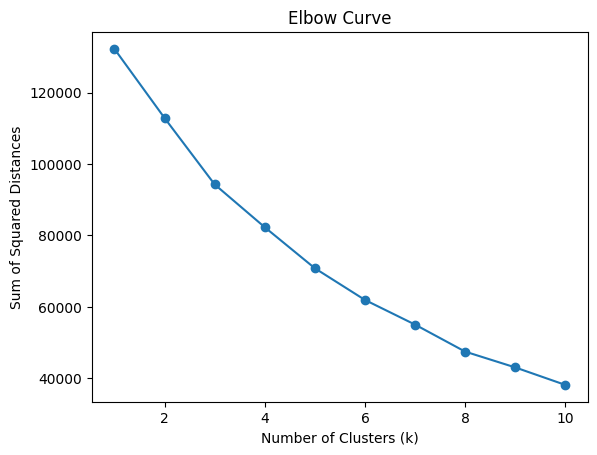

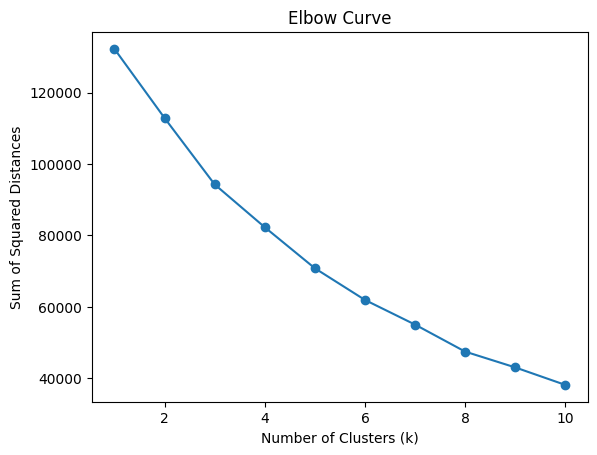

In [7]:
# Plot the elbow curve
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.show()


In [8]:
# Based on the elbow plot
optimal_k = 8  

In [9]:
# K-means Clustering with Optimal Number of Clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_ml['Cluster'] = kmeans.fit_predict(X_scaled)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [10]:
# Function to get similar game names based on input game name
def get_similar_game_names(input_game, num_suggestions=3):
    input_game_lower = input_game.lower()  # Converts the input to lowercase

    try:
        # Find the row for the input game (case-insensitive)
        input_game_row = df_ml[df_ml['game'].str.lower() == input_game_lower].iloc[0]
    except IndexError:
        # If there's no exact match, suggest similar names
        all_game_names_lower = df_ml['game'].str.lower().tolist()
        similar_names = process.extract(input_game_lower, all_game_names_lower, limit=num_suggestions)
        
        suggestions = [name for name, _ in similar_names]
        
        print(f"No match found for the game '{input_game}'. You can try:")
        for suggestion in suggestions:
            print(f"- {suggestion.capitalize()}")  # Capitalizes the suggestions for better readability
        return []

    # Get features for the input game
    input_game_features = input_game_row[selected_features].values.reshape(1, -1)

    # Predict the cluster for the input game
    predicted_cluster = kmeans.predict(scaler.transform(input_game_features))[0]

    # Filter similar games in the same cluster (excluding the input game itself)
    similar_games = df_ml[(df_ml['Cluster'] == predicted_cluster) & (df_ml['game'] != input_game_row['game'])].head(num_suggestions)

    # Extract names of similar games
    similar_game_names = similar_games['game'].tolist()

    return similar_game_names

In [11]:
# Example: Input a game and get similar game names !!!!!!!limit to 3 suggestions!!!!
chosen_game = input("Please type in your desired game: ")
similar_game_names = get_similar_game_names(chosen_game, num_suggestions=3)

# Print the result
print(f"Similar Games to '{chosen_game}':")
print(similar_game_names)


Please type in your desired game: Fortnite
Similar Games to 'Fortnite':
['Malice', 'Palallel', 'En Route: Space']


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Similar Games to 'Fortnite':
['Malice', 'Palallel', 'En Route: Space']


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [12]:
import hvplot.pandas
scatter_plot = df_ml.hvplot.scatter(
    x="reviewer_rating",
    y="positivity_ratio",
    by="Cluster",
    hover_cols=["game"],
    title="Scatter Plot by Game Segment - k=8"
)

# Show the plot
hvplot.show(scatter_plot)


Launching server at http://localhost:55088
Launching server at http://localhost:55088


In [13]:
# export the model
import pickle

def save_model():
    # ... (same computation as before)

    # Save computed data as a binary file
    with open('computed_data.pkl', 'wb') as file:
        pickle.dump({
            'df_ml': df_ml,
            'selected_features': selected_features,
            'scaler': scaler,
            'kmeans': kmeans,
        }, file)
        
# save_model()